# Question 4: Can a predictive model be built for future prediction of the possibility of complaints of the specific type that you identified in response to Question 1?

## Import datasets and basic libraries

In [18]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

binary_df = pd.read_csv("Merged Binary Complaint Approach.csv")
num_com_df = pd.read_csv("Num of Complaints Approach.csv")

/Users/zenoix/opt/anaconda3/envs/IBM-DS/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## This notebook will use two approaches to attempt to answer question 4
1. Use a binary approach where the features will either end in a complaint being made(represented by a 1) or not (represented by a 0)
2. Consider the total number of complaints for each street based on the building's features

In [2]:
binary_df.head()

,Incident Address,Complaint Made,Lot,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR
0,2781 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
1,2691 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
2,2763 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
3,2763 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
4,2763 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0


In [3]:
num_com_df.head()

,Number of Complaints,Lot,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR
0,975,9039,4905,0,0,0,0,0,0.0,93.55,0.0,0,0,0.0,6.02,0.0,6.5
1,4,112,11692,0,0,0,0,0,0.0,146.25,0.0,0,0,0.0,0.00,0.0,0.0
2,4,114,0,0,0,0,0,0,0.0,151.58,0.0,0,0,0.0,0.00,2.0,6.5
3,4,130,7200,0,0,0,0,0,0.0,118.00,0.0,1931,0,0.0,0.00,2.0,6.5
4,4,1,400,0,0,0,0,0,0.0,5.00,5.0,0,0,0.0,0.00,2.0,0.0


## Approach 1: Binary Approach
I am first going to be using a binary logistic regression to predict if a complaint will be made or not.

### Model building

In [4]:
# Create the features (X) and target (y)
X = binary_df[binary_df.columns[2:]]
y = binary_df["Complaint Made"]

In [5]:
# Scale the feature values
X = StandardScaler().fit(X).transform(X)

In [6]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [10]:
# Build the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.01, solver='liblinear')

# Train the model and create prediction of the testing data
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
yhat

array([0, 1, 1, ..., 1, 1, 1])

### Model evaluation
#### Jaccard index
Using Jaccard index evaluate the model

In [15]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.9899171594785319

We see that our model has a very good jaccard score of 0.989

#### Confusion matrix

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[329094   1095]
 [  2257  23975]]


Confusion matrix, without normalization
[[329094   1095]
 [  2257  23975]]


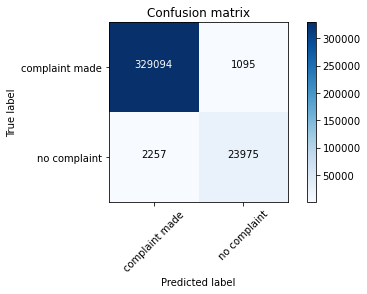

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['complaint made','no complaint'],normalize= False,  title='Confusion matrix')